In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [46]:
x,y=make_moons(n_samples=1000,noise=0.2) 

In [47]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [48]:
dataset = pd.DataFrame(df)

In [49]:
dataset

,x1,x2,y
0,0.607387,-0.550210,1
1,1.718359,0.381413,1
2,0.688212,-0.208869,1
3,0.690022,-0.792121,1
4,0.619372,0.798321,0
...,...,...,...
995,0.009188,0.144836,1
996,-0.569258,0.434913,0
997,0.983192,-0.716020,1
998,1.532050,-0.102049,1


In [50]:
import seaborn as sns

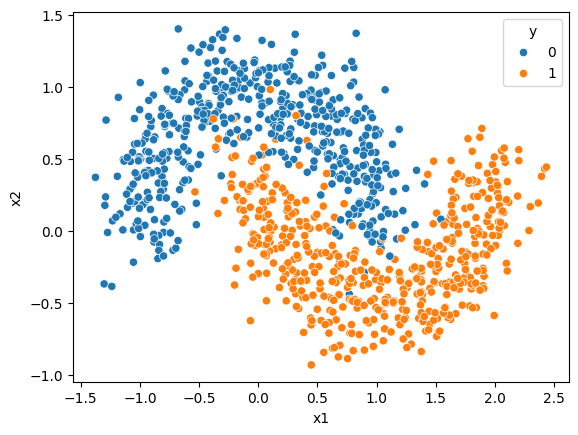

In [51]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [52]:
x_a = dataset.iloc[:,:-1]

In [53]:
y_a = dataset["y"]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
from sklearn.svm import SVC

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 95.0)

In [60]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(96.125, 97.0)

In [61]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100,gnb.score(x_test,y_test)*100

(87.0, 87.5)

In [62]:
# implementing ENSEMBLE LEARNING

In [63]:
from sklearn.ensemble import VotingClassifier

In [66]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [69]:
vc = VotingClassifier(li,weights=[5,4,7])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[5, 4, 7])

In [70]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(96.75, 97.0)